# Lab assignment: Clustering

* **Author**: Professor Nakul

**Instructions** 

* Read and work through all tutorial content and do all exercises below
  
**Submission:**

* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

# Data Import and Cleaning and Exploration.

This fairly new dataset on Palmer Island Penguins was collected and made available by [Dr. Kristen Gorman](https://pallter.marine.rutgers.edu/) and the [Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/). 

The datasets contain data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica. We will perform clustering procedure on this dataset.


# Import libraries and load the dataset

Make sure to drop the rowid column

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
# import penguins dataset and drop rowid column
df = pd.read_csv('./penguins.csv')
df.drop(columns = 'rowid', inplace = True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Perform Exploteratory Data Analysis

Following steps are required for any data analysis project:

## Check the number of rows and columns in the dataset

In [3]:
# get the number of rows and columns
df.shape

(344, 8)

## Get the data types of the columns

In [4]:
# get column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


## Check for missing values

In [5]:
# check for missing values
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## Check unique values for categorical columns. For a unusual data value make sure to replace it with the most frequent value (for categorical columns), and with the mean value (for numerical columns)

There are a lot of missing values in `sex` column, make a conscious decision on how to handle them. Write two+ lines on what procedure and logic you used to make that decision. For example, you can write, "I chose to replace values for Adelie penguins on Torgersen island to be all male (or x% male and (1-x)% female)... I chose this procedure because number of penguins male penguins were underrepresented (a usual ratio is for mammels is around 55% female and 45% males)"replace the missing values with the most frequent value in the column.

In [6]:
# get y labels
print(df['island'].unique())

['Torgersen' 'Biscoe' 'Dream']


/var/folders/1z/6nvrnkz13ms1y39fh2328y7m0000gn/T/ipykernel_71611/340608196.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'island', palette = 'Set2')


<Axes: xlabel='island', ylabel='count'>

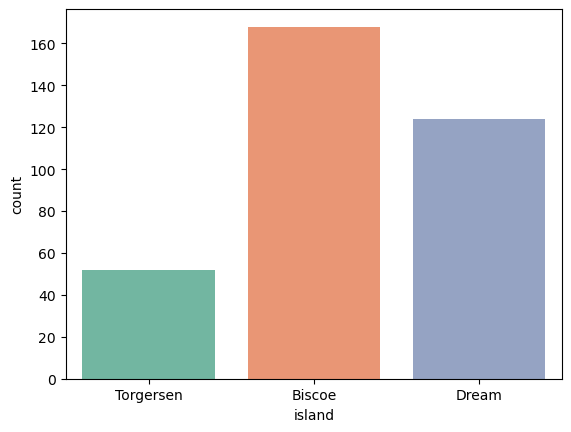

In [7]:
# plot number of penguins on each island
sns.countplot(data = df, x = 'island', palette = 'Set2')

In [8]:
# get sex labels
print(df['sex'].unique())

['male' 'female' nan]


/var/folders/1z/6nvrnkz13ms1y39fh2328y7m0000gn/T/ipykernel_71611/554705140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'sex', palette = 'Set2')


<Axes: xlabel='sex', ylabel='count'>

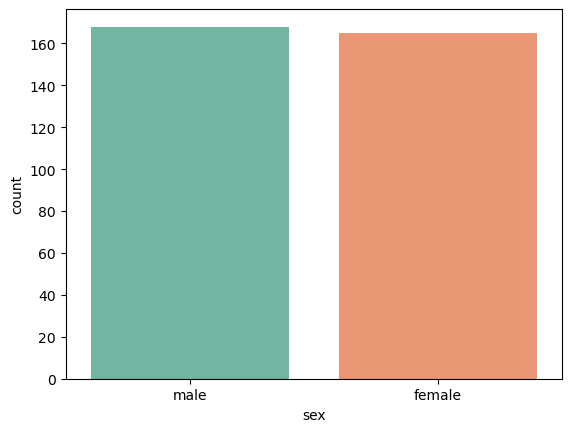

In [9]:
# plot number of penguins by sex
sns.countplot(data = df, x = 'sex', palette = 'Set2')

In [10]:
# get species labels
print(df['species'].unique())

['Adelie' 'Gentoo' 'Chinstrap']


/var/folders/1z/6nvrnkz13ms1y39fh2328y7m0000gn/T/ipykernel_71611/2484692888.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'species', palette='Set2')


<Axes: xlabel='species', ylabel='count'>

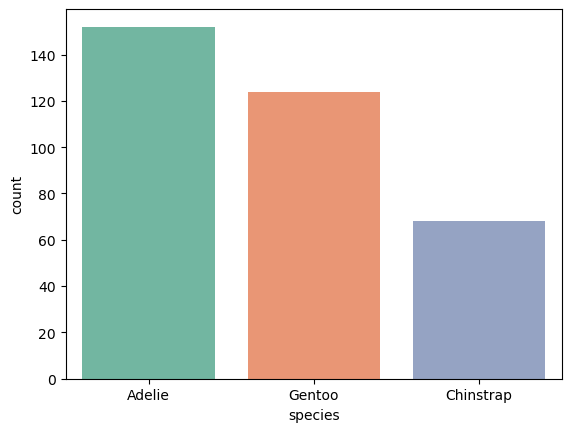

In [11]:
# plot number of penguins by species
sns.countplot(data = df, x = 'species', palette='Set2')

<Axes: xlabel='sex', ylabel='count'>

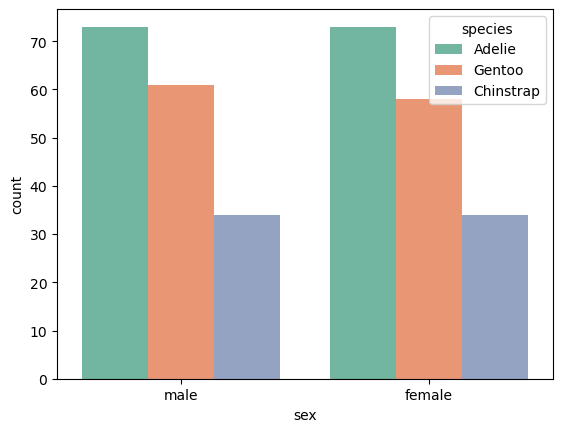

In [12]:
# get number of penguins by species and sex
sns.countplot(data = df, x = 'sex', hue = 'species', palette = 'Set2')

[Text(0.5, 0, 'Bill Length (mm)'),
 Text(0, 0.5, 'Bill Depth (mm)'),
 Text(0.5, 1.0, 'Bill Length vs. Bill Depth')]

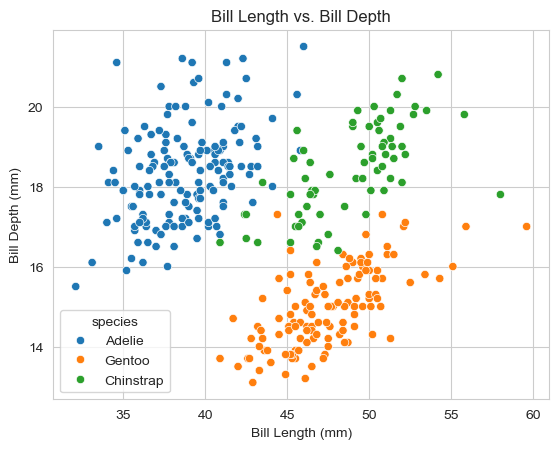

In [13]:
# plot  bill length vs bill depth and color by speciess
sns.set_style('whitegrid')
bill = sns.scatterplot(data = df, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species')
bill.set(xlabel = 'Bill Length (mm)', ylabel = 'Bill Depth (mm)', title = 'Bill Length vs. Bill Depth')

In [14]:
# check for Nan values for sex
df[df['sex'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [15]:
# check for Nan values for bill_length_mm
df[df['bill_length_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


In [16]:
# check for Nan values for bill_depth_mm
df[df['bill_depth_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


In [17]:
# check for Nan values for flipper_length_mm
df[df['flipper_length_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


In [18]:
# check for Nan values for body_mass_g
df[df['body_mass_g'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


In [19]:
# Replace continuous missing values with mean of the column. check for Nan values again.
df['bill_length_mm'].fillna(df['bill_length_mm'].mean(), inplace=True)
df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)

df.isna().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
year                  0
dtype: int64

In [129]:
# Replace categorical missing values with mode of the column. check for Nan values again.
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

Since the sex column is categorical value, we chose to input the data with the mode of the sex column. I personally think the reason of this is to minimize the error as much as possible and probably taking the mode value is the simplest way to replace the null value. I would have used the same method in order to replace the null value. 

In [20]:
# Replace categorical values with category codes by using the cat.codes function. you can either replace them in place or create a new column. show the altered dataframe again by using head() 
df['species'] = df['species'].astype('category').cat.codes
df['island'] = df['island'].astype('category').cat.codes
df['sex_M'] = df['sex'].astype('category').cat.codes
df.drop('sex',axis=1,inplace=True)

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_M
0,0,2,39.10000,18.70000,181.000000,3750.000000,2007,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,2007,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,2007,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,2007,-1
4,0,2,36.70000,19.30000,193.000000,3450.000000,2007,0


# Seperate the dataset into features and labels

In [21]:
# Split the dataset in X and y. since this is unsupervised learning, we will not use the y labels. you can choose to normalize the X data by using the c function.

# remove binary, string columns
# keep the continuous columns

x = df.drop(['species'], axis=1)
y = df[['species']]

# gives the centroid of all the clusters -> normal distribution
# standard scaler: normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
pd.DataFrame(X, columns=x.columns, index=x.index)

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_M
0,1.844076,-8.870812e-01,0.787743,-1.422488,-0.565789,-1.259316,0.973127
1,1.844076,-8.134940e-01,0.126556,-1.065352,-0.503168,-1.259316,-0.817011
2,1.844076,-6.663195e-01,0.431719,-0.422507,-1.192003,-1.259316,-0.817011
3,1.844076,-1.307172e-15,0.000000,0.000000,0.000000,-1.259316,-2.607148
4,1.844076,-1.328605e+00,1.092905,-0.565361,-0.941517,-1.259316,-0.817011
...,...,...,...,...,...,...,...
339,0.465028,2.185186e+00,1.347208,0.434620,-0.252683,1.188168,0.973127
340,0.465028,-7.762162e-02,0.482580,0.077484,-1.004139,1.188168,-0.817011
341,0.465028,1.044584e+00,0.533440,-0.565361,-0.534479,1.188168,0.973127
342,0.465028,1.265345e+00,0.940324,0.648902,-0.127440,1.188168,0.973127


# Perform K-means

In [22]:
# import relevent libraries for clustering. we will use KMeans, AgglomerativeClustering, MeanShift, Birch, and DBSCAN
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, Birch, DBSCAN

In [23]:
model = KMeans(n_clusters=1, random_state=0).fit(X)
model.cluster_centers_

/Users/hannahkim/opt/anaconda3/envs/dsan5000/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[-2.90142587e-16, -7.02280611e-16,  4.11169806e-16,
        -5.75444085e-16,  6.32568933e-17,  7.64659653e-14,
         2.11394210e-16]])

In [24]:
# for k means clustering we will use the elbow method to find the optimal number of clusters. we will use the inertia_ attribute to find the sum of squared distances of samples to their closest cluster center. we will use the range of 1 to 10 clusters. plot the inertia_ values for each number of clusters. make sure to save it in a dataframe and plot it using matplotlib.
from scipy.spatial.distance import cdist

cluster = []
distance = []
inertia = []
for i in range(1,11):
    model = KMeans(n_clusters=i, random_state=0).fit(X)
    inertia.append(model.inertia_)
    distance.append(sum(np.min(cdist(X, model.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]) 
    cluster.append(i)

df2 = pd.DataFrame({'Clusters': cluster, 'Distortion': distance, 'Inertia': inertia})
df2

/Users/hannahkim/opt/anaconda3/envs/dsan5000/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/hannahkim/opt/anaconda3/envs/dsan5000/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hannahkim/opt/anaconda3/envs/dsan5000/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hannahkim/opt/anaconda3/envs/dsan5000/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hannahkim/opt/anaconda3/envs/dsan5000/lib/python3.11/site-packages/sklearn/

,Clusters,Distortion,Inertia
0,1,2.591623,2408.000000
1,2,1.986133,1443.104983
2,3,1.773038,1150.072776
3,4,1.583738,960.334607
4,5,1.490361,852.945702
5,6,1.405167,756.408554
6,7,1.357159,698.610112
7,8,1.302304,646.187090
8,9,1.235330,599.056937
9,10,1.190393,557.554566


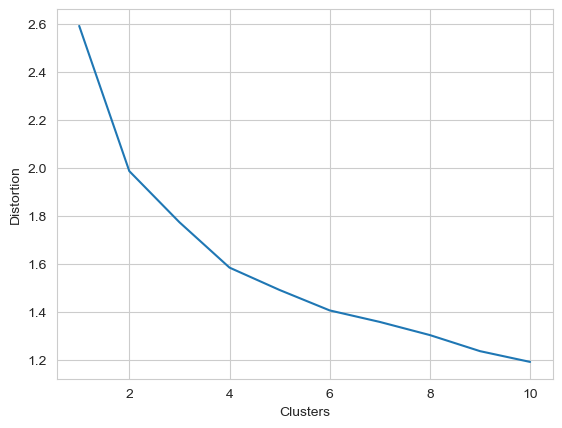

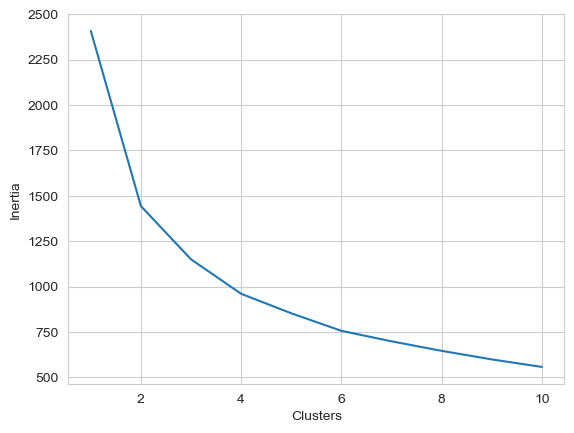

In [25]:
# plot distortion and inertia for kmeans, you can either plot them seperately or use fig, ax = plt.subplots(1, 2) to plot them in the same figure. Suggest the optimal number of clusters based on the plot.
sns.lineplot(data=df2, x = 'Clusters', y = 'Distortion')
plt.show()

sns.lineplot(data=df2, x = 'Clusters', y = 'Inertia')
plt.show()

Based on the plot, I would choose 4 as the number of clusters.

# Perform DBSCAN and predict the labels

In [26]:
# perform DBSCAN clustering. use the eps and min_samples parameters to find the optimal number of clusters. plot the number of clusters vs the silhouette score. Suggest the optimal number of clusters based on the plot.

# less picking up the blobs, but more powerful for blobs that 

# loop
# scikit learn

model = DBSCAN(eps=.7, min_samples=15)
preds = model.fit_predict(X)
len(pd.Series(preds).unique())

2

In [28]:
from sklearn.metrics import silhouette_score
import random
random.seed(42)
cluster = []
epsilon = []
silhouette = []
for i in [.5,.6,.7,.8,.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]:
    model = DBSCAN(eps=i, min_samples=5)
    preds = model.fit_predict(X)
    epsilon.append(i)
    silhouette.append(silhouette_score(X, preds))
    cluster.append(len(pd.Series(preds).unique()))
    

df3 = pd.DataFrame({'Clusters': cluster, 'Epsilon': epsilon, 'Silhouette': silhouette})
df3

,Clusters,Epsilon,Silhouette
0,9,0.5,-0.154664
1,11,0.6,-0.034710
2,16,0.7,0.011143
3,21,0.8,0.128086
4,23,0.9,0.182225
5,26,1.0,0.239687
6,27,1.1,0.283456
7,26,1.2,0.289194
8,10,1.3,0.241778
9,6,1.4,0.259361


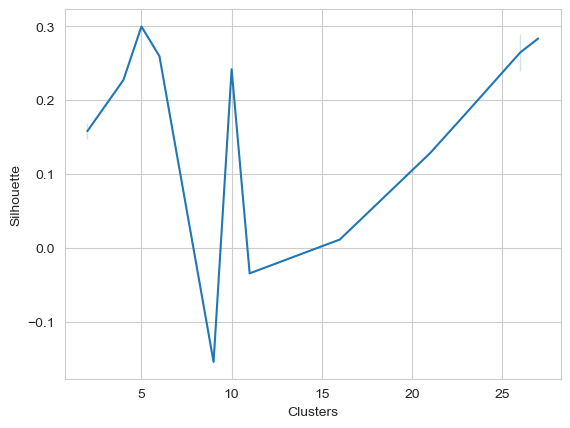

In [29]:
sns.lineplot(data=df3, x='Clusters',y='Silhouette')
plt.show()

The optimal number of clusters is 5 with the silhouette number approximately 0.3.

# Agglomerative Clustering (Hierarchical clustering)

In [30]:
# Perform Agglomerative Clustering
clusters = []
silhouette = []
for i in range(2,11):
    model = AgglomerativeClustering(n_clusters=i)
    preds = model.fit_predict(X)
    silhouette.append(silhouette_score(X, preds))
    clusters.append(i)
    
df4 = pd.DataFrame({'Clusters': clusters, 'Silhouette': silhouette})
df4

,Clusters,Silhouette
0,2,0.373264
1,3,0.313116
2,4,0.313533
3,5,0.294503
4,6,0.305551
5,7,0.310715
6,8,0.307395
7,9,0.317040
8,10,0.300463


 ### Plot the clusters for Agglomerative Clustering

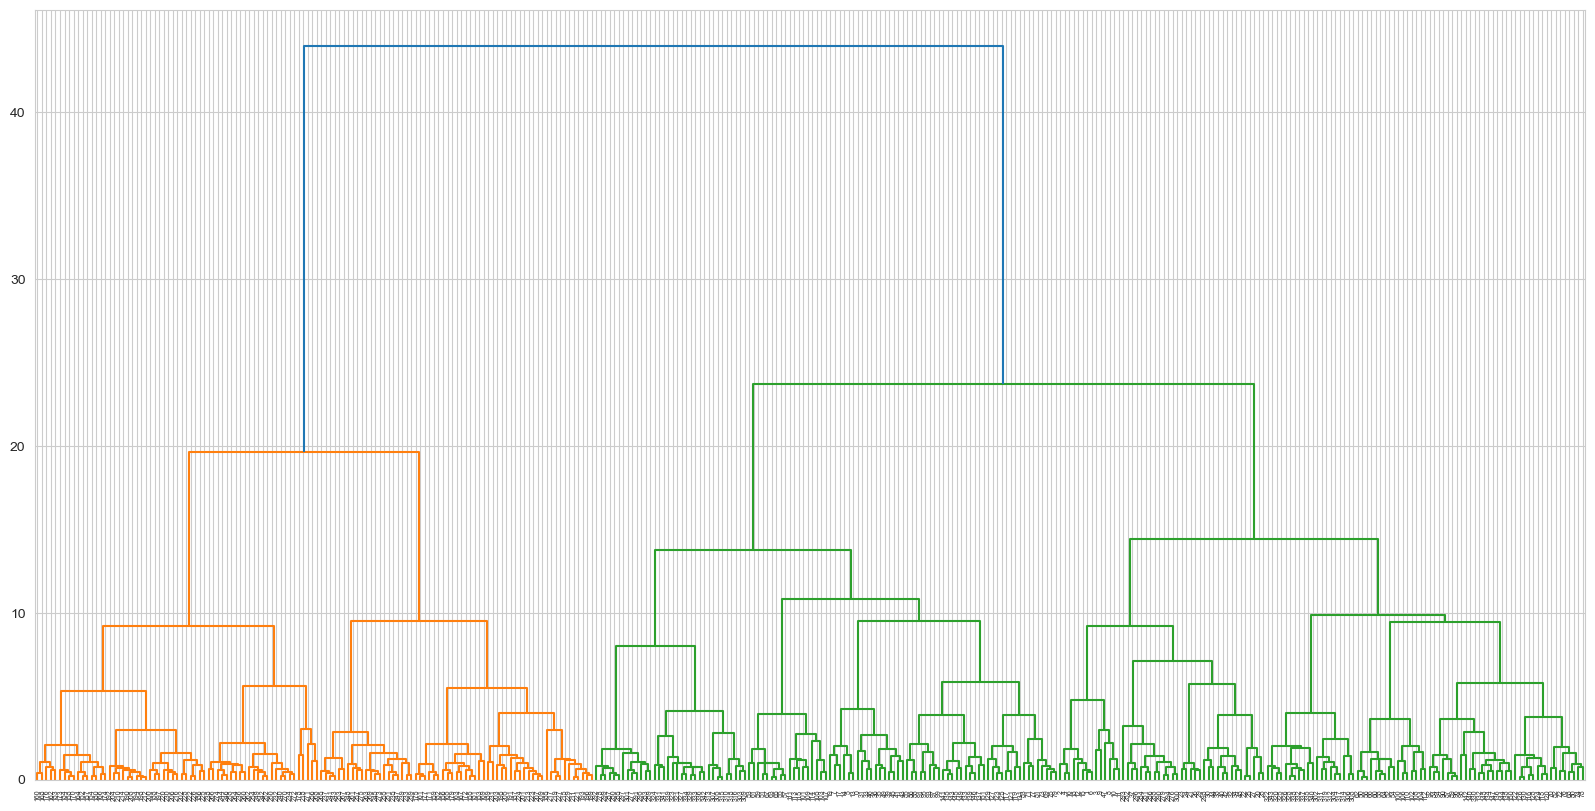

In [31]:
# create linkage for agglomerative clustering, and the dendrogram for the linkage. Suggest the optimal number of clusters based on the dendrogram.
from scipy.cluster.hierarchy import dendrogram, linkage

zelda = linkage(X, method='ward')
plt.figure(figsize=(20,10))
plot = dendrogram(zelda)

Based on the dendogram and the silhouette scores, I think the optimal number of clusters should be 4. 

# Mean Shift

In [32]:
# Perform MeanShift Clustering and predict number 
clusters = MeanShift(bandwidth=2).fit(X)
preds = clusters.predict(X)
print('Number of estimated clusters : ' + str(sum([1 for x in np.unique(preds)])))

Number of estimated clusters : 5


 ### Plot the clusters for Mean Shift Clustering

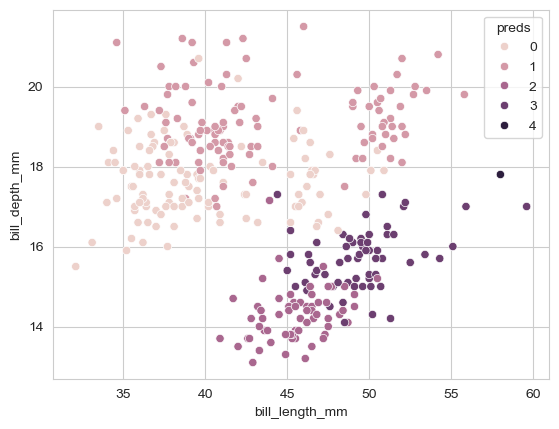

In [33]:
x['preds'] = preds
sns.scatterplot(x=x.bill_length_mm, y=x.bill_depth_mm, hue=x.preds);

# Birch

In [34]:
# perform birc clustering and predict number of clusters
import sklearn
def maximize_silhouette(X,algo="birch",nmax=20,i_plot=False):

    # PARAM
    i_print=False

    #FORCE CONTIGUOUS
    X = np.ascontiguousarray(X) 

    # LOOP OVER HYPER-PARAM
    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):
        if(algo=="birch"):
            model = sklearn.cluster.Birch(n_clusters=param).fit(X)
            labels=model.predict(X)

        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue 

        if(i_print): print(param,sil_scores[-1])
        
        if(sil_scores[-1]>sil_max):
             opt_param=param
             sil_max=sil_scores[-1]
             opt_labels=labels

    print("Optimal number of clusters: ",opt_param)

    #if(i_plot):
        #fig, ax = plt.subplots()
        #ax.plot(params, sil_scores, "-o")  
        #ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        #plt.show()

    return opt_labels

opt_labels=maximize_silhouette(X,algo="birch",nmax=15, i_plot=True)

Optimal number of clusters:  2
